<a href="https://colab.research.google.com/github/vvithurshan/Regression_model_for_flu/blob/main/Regression_model_to_predict_ic50_of_antibody_flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json("descriptors-med.json")

In [ ]:
df = pd.DataFrame.from_dict(df).T

In [ ]:
df.drop(['modeller_slow', 'modeller_veryfast', 'rosetta'], axis = 1, inplace = True)

In [ ]:
df2 = df.to_dict()

In [ ]:
df3 = df2['modeller_fast']

In [ ]:
DF = pd.DataFrame(df3)

In [ ]:
DF = DF.T

In [ ]:
DF.head()

,>TIME_AGBNP,>TIME_ATTRACT,>TIME_CDIE,>TIME_DOPE,>TIME_ENM_EXP,>TIME_ENM_R6,>TIME_FACTS,>TIME_FoldX,>TIME_GBMV,>TIME_GBSW,...,pyDock,pyDock_desolv,pyDock_elec,pyDock_vdw,sticky_avg,sticky_tot,>TIME_SOAP-PP-Pair,>TIME_SOAP-Protein-OD,SOAP-PP-Pair,SOAP-Protein-OD
FI2013__H1_BJ_95,10.124471,12.931165,159.799514,17.052232,268.186359,238.912742,191.222147,1586.599194,849.833163,583.701737,...,-47.8700,-15.2520,-22.6635,-102.8510,0.314450,6.43980,NaN,NaN,NaN,NaN
FI2013__H1_BR_2010,10.789689,12.747782,162.979750,16.813981,266.434008,252.247141,190.588941,1388.337460,852.003387,583.892237,...,-39.0910,-16.5615,-13.3335,-107.1460,0.301616,6.59770,NaN,NaN,NaN,NaN
FI2013__H1_CA_2009,10.464779,12.818810,160.151605,16.764643,279.063044,262.720583,188.771967,1589.927461,847.204554,581.720644,...,-44.4350,-16.0400,-19.1655,-106.5790,0.308737,6.52840,NaN,NaN,NaN,NaN
FI2013__H1_FM_47,10.604280,13.017617,162.828048,17.007462,255.912472,234.794180,189.462500,1606.481635,861.631994,588.551876,...,-44.9375,-13.4435,-20.2995,-104.3095,0.286412,6.22430,NaN,NaN,NaN,NaN
FI2013__H1_NC_99,12.075853,12.955694,160.077650,16.726850,282.789572,290.114370,186.757944,1565.804253,851.047337,579.877243,...,-45.9415,-14.8395,-21.0195,-105.9640,0.310321,6.80255,NaN,NaN,NaN,NaN


In [ ]:
DF.columns

Index(['>TIME_AGBNP', '>TIME_ATTRACT', '>TIME_CDIE', '>TIME_DOPE',
       '>TIME_ENM_EXP', '>TIME_ENM_R6', '>TIME_FACTS', '>TIME_FoldX',
       '>TIME_GBMV', '>TIME_GBSW',
       ...
       'pyDock', 'pyDock_desolv', 'pyDock_elec', 'pyDock_vdw', 'sticky_avg',
       'sticky_tot', '>TIME_SOAP-PP-Pair', '>TIME_SOAP-Protein-OD',
       'SOAP-PP-Pair', 'SOAP-Protein-OD'],
      dtype='object', length=118)

In [ ]:
for i in DF.columns:
  if '>' in i:
    DF.drop(i,axis=1,inplace=True)

In [ ]:
DF.dropna(axis=1, inplace = True)

In [ ]:
DF = DF.reset_index()

In [ ]:
DF = DF.rename(columns={'index': 'PDB'})

In [ ]:
DF.head()

,PDB,AGBNP,ATTRACT,BSA,BSA_A,BSA_C,BSA_P,CDIE_ELEC,CDIE_TOT,CDIE_VDW,...,ipot_aace167,ipot_aace18,ipot_aace20,ipot_rrce20,pyDock,pyDock_desolv,pyDock_elec,pyDock_vdw,sticky_avg,sticky_tot
0,FI2013__H1_BJ_95,-4.565918,-11.882794,2415.535412,657.578178,565.636275,1186.751680,-204.233240,-290.798970,-91.522125,...,-43.82245,-38.71265,-10.518250,-2.301315,-47.8700,-15.2520,-22.6635,-102.8510,0.314450,6.43980
1,FI2013__H1_BR_2010,-4.760010,-9.943827,2438.191344,719.082354,527.536455,1178.512073,-155.756180,-251.322100,-90.325880,...,-49.46255,-42.04430,-19.409700,-3.273270,-39.0910,-16.5615,-13.3335,-107.1460,0.301616,6.59770
2,FI2013__H1_CA_2009,-8.548584,-9.321229,2441.095218,719.920193,543.670590,1175.879025,-124.304720,-213.383790,-91.944120,...,-51.51225,-43.57110,-20.027550,-3.266670,-44.4350,-16.0400,-19.1655,-106.5790,0.308737,6.52840
3,FI2013__H1_FM_47,-6.476562,-10.681807,2443.834014,651.792048,585.808927,1179.571479,-285.777435,-371.290590,-88.749810,...,-42.85905,-38.87665,-9.340675,-1.803445,-44.9375,-13.4435,-20.2995,-104.3095,0.286412,6.22430
4,FI2013__H1_NC_99,-5.003418,-11.447622,2432.821153,649.234235,581.285926,1181.386098,-277.968310,-362.463535,-83.513290,...,-44.44240,-40.45080,-10.122420,-2.126065,-45.9415,-14.8395,-21.0195,-105.9640,0.310321,6.80255


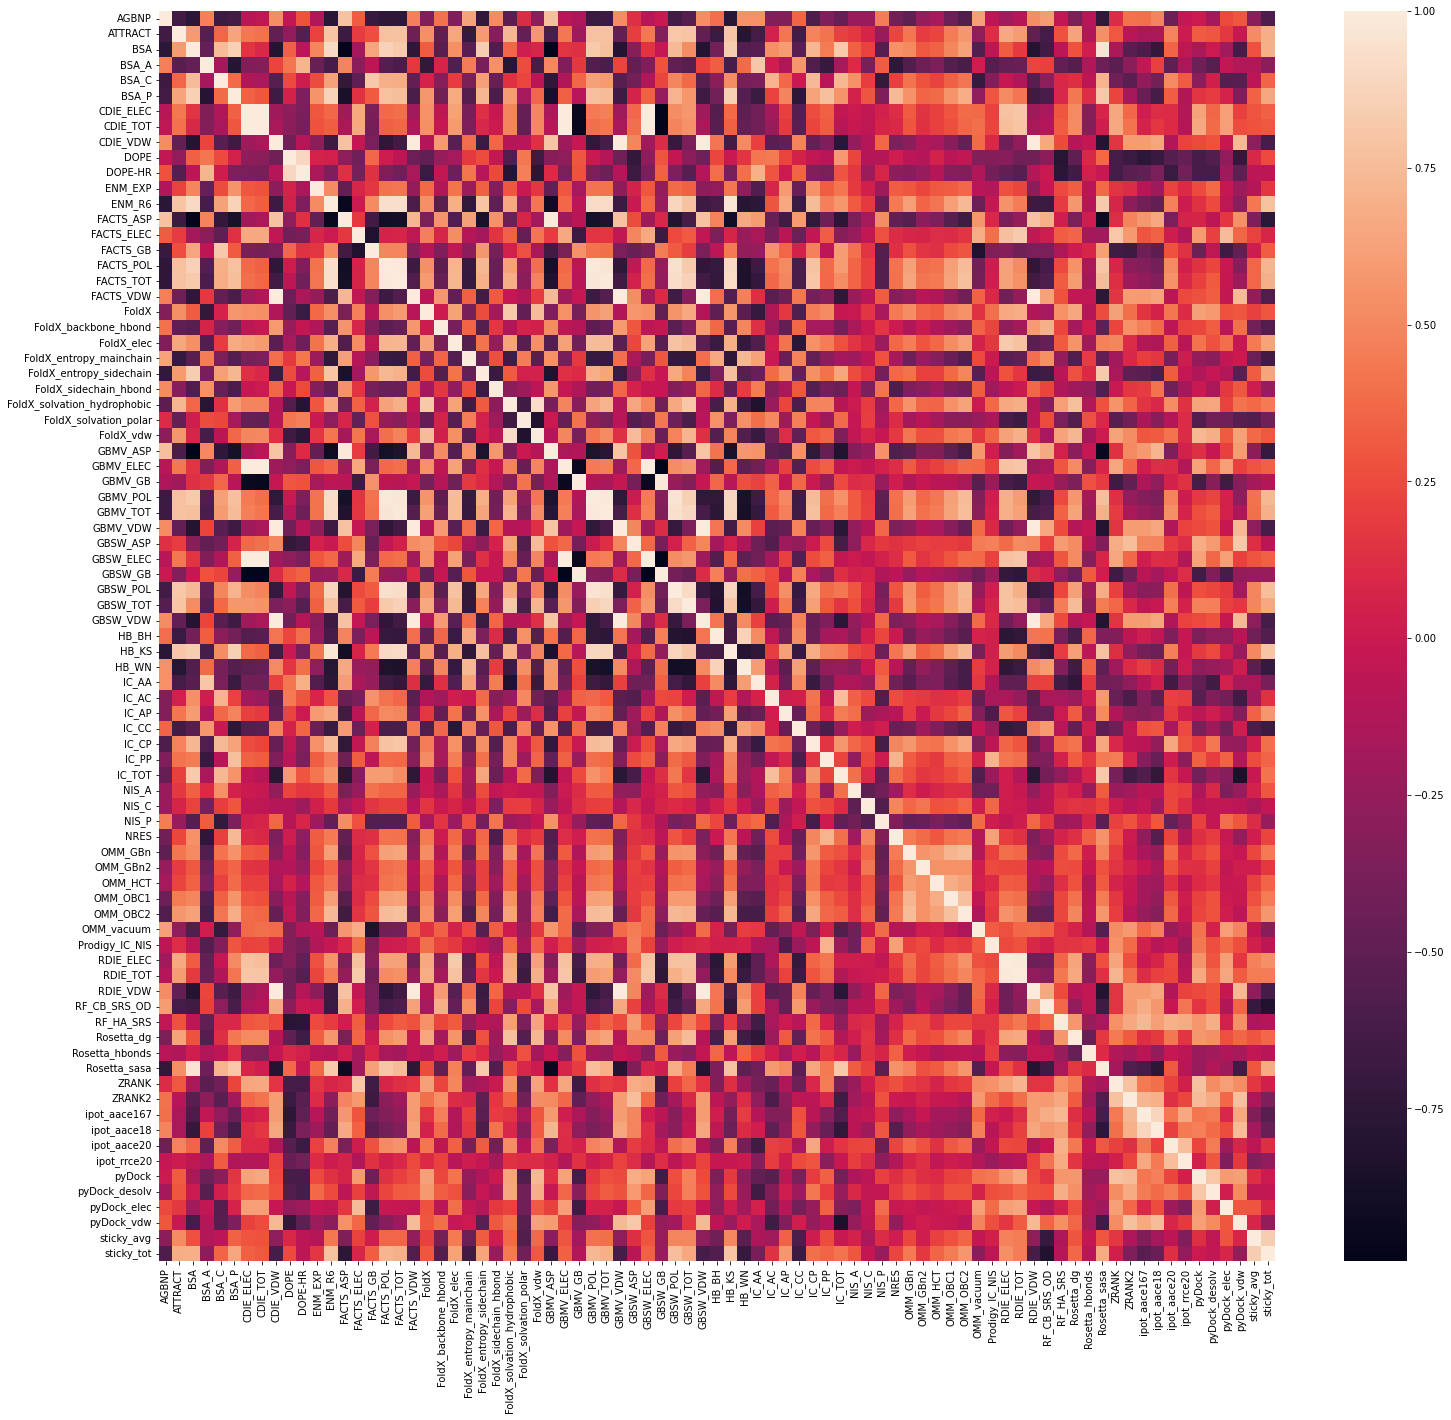

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 23))
sns.heatmap(DF.corr())
plt.show()


In [ ]:
exp = {}
with open('ppdb.txt') as fp:
    for line in fp:
        if line[0]=='#':
            continue
        name, recn, lign, dgexp, tpl = line.split()
        exp[name] = dgexp

In [ ]:
DF['Experimental'] = DF['PDB'].map(exp)

In [ ]:
DF.head()

,PDB,AGBNP,ATTRACT,BSA,BSA_A,BSA_C,BSA_P,CDIE_ELEC,CDIE_TOT,CDIE_VDW,...,ipot_aace18,ipot_aace20,ipot_rrce20,pyDock,pyDock_desolv,pyDock_elec,pyDock_vdw,sticky_avg,sticky_tot,Experimental
0,FI2013__H1_BJ_95,-4.565918,-11.882794,2415.535412,657.578178,565.636275,1186.751680,-204.233240,-290.798970,-91.522125,...,-38.71265,-10.518250,-2.301315,-47.8700,-15.2520,-22.6635,-102.8510,0.314450,6.43980,1.84629
1,FI2013__H1_BR_2010,-4.760010,-9.943827,2438.191344,719.082354,527.536455,1178.512073,-155.756180,-251.322100,-90.325880,...,-42.04430,-19.409700,-3.273270,-39.0910,-16.5615,-13.3335,-107.1460,0.301616,6.59770,1.26658
2,FI2013__H1_CA_2009,-8.548584,-9.321229,2441.095218,719.920193,543.670590,1175.879025,-124.304720,-213.383790,-91.944120,...,-43.57110,-20.027550,-3.266670,-44.4350,-16.0400,-19.1655,-106.5790,0.308737,6.52840,1.56722
3,FI2013__H1_FM_47,-6.476562,-10.681807,2443.834014,651.792048,585.808927,1179.571479,-285.777435,-371.290590,-88.749810,...,-38.87665,-9.340675,-1.803445,-44.9375,-13.4435,-20.2995,-104.3095,0.286412,6.22430,1.07247
4,FI2013__H1_NC_99,-5.003418,-11.447622,2432.821153,649.234235,581.285926,1181.386098,-277.968310,-362.463535,-83.513290,...,-40.45080,-10.122420,-2.126065,-45.9415,-14.8395,-21.0195,-105.9640,0.310321,6.80255,0.856641


In [ ]:
## removing > and <
DF['Experimental'] = DF['Experimental'].apply(lambda X: X.replace(">","").replace("<","") )

In [ ]:
DF

,PDB,AGBNP,ATTRACT,BSA,BSA_A,BSA_C,BSA_P,CDIE_ELEC,CDIE_TOT,CDIE_VDW,...,ipot_aace18,ipot_aace20,ipot_rrce20,pyDock,pyDock_desolv,pyDock_elec,pyDock_vdw,sticky_avg,sticky_tot,Experimental
0,FI2013__H1_BJ_95,-4.565918,-11.882794,2415.535412,657.578178,565.636275,1186.751680,-204.233240,-290.798970,-91.522125,...,-38.71265,-10.518250,-2.301315,-47.8700,-15.2520,-22.6635,-102.8510,0.314450,6.43980,1.84629
1,FI2013__H1_BR_2010,-4.760010,-9.943827,2438.191344,719.082354,527.536455,1178.512073,-155.756180,-251.322100,-90.325880,...,-42.04430,-19.409700,-3.273270,-39.0910,-16.5615,-13.3335,-107.1460,0.301616,6.59770,1.26658
2,FI2013__H1_CA_2009,-8.548584,-9.321229,2441.095218,719.920193,543.670590,1175.879025,-124.304720,-213.383790,-91.944120,...,-43.57110,-20.027550,-3.266670,-44.4350,-16.0400,-19.1655,-106.5790,0.308737,6.52840,1.56722
3,FI2013__H1_FM_47,-6.476562,-10.681807,2443.834014,651.792048,585.808927,1179.571479,-285.777435,-371.290590,-88.749810,...,-38.87665,-9.340675,-1.803445,-44.9375,-13.4435,-20.2995,-104.3095,0.286412,6.22430,1.07247
4,FI2013__H1_NC_99,-5.003418,-11.447622,2432.821153,649.234235,581.285926,1181.386098,-277.968310,-362.463535,-83.513290,...,-40.45080,-10.122420,-2.126065,-45.9415,-14.8395,-21.0195,-105.9640,0.310321,6.80255,0.856641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,FY_UCA__H3_WI_2005,0.317383,-18.156498,1845.308982,788.310329,371.653243,666.159566,-228.202435,-300.427485,-72.376460,...,-29.70830,-20.730600,-2.337940,-39.6600,-13.8615,-16.2720,-92.8070,0.267980,4.48445,3.91202
346,FY_UCA__H5_VT_2004,-1.222412,-17.624475,1873.250200,632.607548,397.995632,845.788466,-202.202170,-280.744905,-76.686630,...,-31.00685,-11.899950,-1.697565,-39.5845,-11.0470,-19.0185,-94.4190,0.201100,3.41150,0.835564
347,FY_UCA__H6_AB_85,-1.037109,-18.620873,1855.063590,647.021194,381.019621,826.608062,-202.357680,-275.448915,-73.962445,...,-31.85860,-16.924300,-2.727070,-35.6775,-11.5245,-14.6140,-92.4075,0.229941,3.84270,0.701619
348,FY_UCA__H7_BC_2004,-0.300293,-18.542237,1879.712366,708.499891,431.579723,731.119148,-338.385600,-414.923220,-75.521175,...,-36.21245,-24.550400,-2.336880,-52.8495,-14.6515,-28.6710,-96.7260,0.268836,5.40615,3.91202


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PDB                          350 non-null    object 
 1   AGBNP                        350 non-null    float64
 2   ATTRACT                      350 non-null    float64
 3   BSA                          350 non-null    float64
 4   BSA_A                        350 non-null    float64
 5   BSA_C                        350 non-null    float64
 6   BSA_P                        350 non-null    float64
 7   CDIE_ELEC                    350 non-null    float64
 8   CDIE_TOT                     350 non-null    float64
 9   CDIE_VDW                     350 non-null    float64
 10  DOPE                         350 non-null    float64
 11  DOPE-HR                      350 non-null    float64
 12  ENM_EXP                      350 non-null    float64
 13  ENM_R6              

In [ ]:
DF['Experimental'] = DF['Experimental'].astype(float)

In [ ]:
DF.describe()

,AGBNP,ATTRACT,BSA,BSA_A,BSA_C,BSA_P,CDIE_ELEC,CDIE_TOT,CDIE_VDW,DOPE,...,ipot_aace18,ipot_aace20,ipot_rrce20,pyDock,pyDock_desolv,pyDock_elec,pyDock_vdw,sticky_avg,sticky_tot,Experimental
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,-1.753303,-13.735429,2059.243471,679.286716,427.036333,951.613275,-225.368173,-305.499842,-80.255240,1766.610868,...,-33.591597,-13.906408,-2.088518,-39.616107,-12.355453,-17.502927,-97.709330,0.273996,5.125814,1.521431
std,2.537228,2.851399,201.874734,79.423809,87.474675,202.396431,81.364903,80.546054,5.320189,82.768120,...,4.133587,4.964712,0.657450,6.652760,5.142199,3.709093,4.094727,0.047825,1.129472,1.689055
min,-9.864014,-19.289607,1803.916886,497.509792,284.198673,649.844761,-488.370225,-560.615110,-98.455070,1537.669922,...,-46.786550,-26.626250,-3.816920,-56.993500,-23.712000,-33.119000,-107.146000,0.129158,2.368550,-2.551340
25%,-3.861084,-15.650001,1896.634806,633.628837,376.530476,732.101180,-261.990736,-342.902324,-83.745599,1720.182861,...,-36.042100,-16.935175,-2.469568,-43.602250,-15.114875,-19.164500,-100.378000,0.244180,4.328887,0.223242
50%,-0.880005,-14.386159,1949.400790,670.498197,414.080237,947.753230,-227.657615,-305.434428,-78.502270,1773.333496,...,-33.349525,-14.693025,-2.076680,-39.657000,-13.255500,-17.147500,-97.265750,0.271922,4.837750,1.135980
75%,0.282349,-11.228815,2240.218120,739.437202,471.183810,1111.509818,-176.231265,-257.354616,-76.210091,1820.696777,...,-30.220925,-10.539750,-1.738024,-37.065750,-10.997750,-15.248375,-95.146875,0.308911,6.075712,3.589738
max,1.633545,-6.705584,2536.427902,827.139845,781.565831,1463.664406,28.532645,-54.834760,-70.787360,1988.124023,...,-24.811700,0.492468,0.042729,-21.422000,4.519000,-7.006500,-87.588500,0.389074,7.991300,3.912020


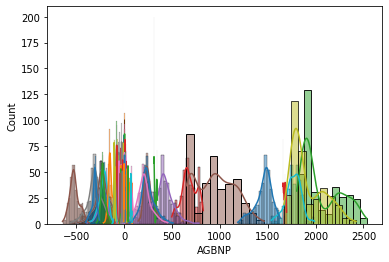

In [ ]:
for column in DF.columns:
  if column == 'PDB':
    continue
  sns.histplot(DF[column],kde=True)

<Axes: xlabel='Experimental', ylabel='Count'>

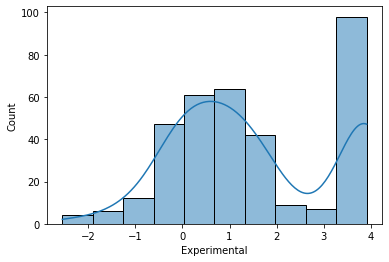

In [ ]:
sns.histplot(DF['Experimental'],kde=True)

### Amino acid sequence

In [ ]:
with open('ppdb.seq') as fp:
    D = {}
    start = False
    for line in fp:
      if '>' in line:
        if start:
          s = S.replace("\n","").split("/")
          Val = []
          for i in s:
            if i not in Val:
              Val.append(i)
          value = "/".join(Val)
          D[name[1:].replace("\n","")] = value
        name = line
        S = ""
        start = True
      else:
         S += line

In [ ]:
D_first = {}
D_second = {}
D_third = {}
D_fourth = {}

for i in D:
  D_first[i] = D[i].split('/')[0]
  D_second[i] = D[i].split('/')[1]
  D_third[i] = D[i].split('/')[2]
  D_fourth[i] = D[i].split('/')[3]

In [ ]:
DF['First'] = DF['PDB'].map(D_first)
DF['Second'] = DF['PDB'].map(D_second)
DF['Third'] = DF['PDB'].map(D_third)
DF['Fourth'] = DF['PDB'].map(D_fourth)


In [ ]:
DF.head()

,PDB,AGBNP,ATTRACT,BSA,BSA_A,BSA_C,BSA_P,CDIE_ELEC,CDIE_TOT,CDIE_VDW,...,pyDock_desolv,pyDock_elec,pyDock_vdw,sticky_avg,sticky_tot,Experimental,First,Second,Third,Fourth
0,FI2013__H1_BJ_95,-4.565918,-11.882794,2415.535412,657.578178,565.636275,1186.751680,-204.233240,-290.798970,-91.522125,...,-15.2520,-22.6635,-102.8510,0.314450,6.43980,1.846290,DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDSHNGKLCLLKG...,GLFGAIAGFIEGGWTGMMDGWYGYHHQNEQGSGYAADQKSTQNAIN...,QVQLVQSGGGVVQPGRSLRLSCVASGFKFSTYAMHWVRQAPGRGLE...,AIVVTQSPDSLALPLGARATINCKSSESVTFNYKNYLSWYQQKPGQ...
1,FI2013__H1_BR_2010,-4.760010,-9.943827,2438.191344,719.082354,527.536455,1178.512073,-155.756180,-251.322100,-90.325880,...,-16.5615,-13.3335,-107.1460,0.301616,6.59770,1.266580,DTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRG...,GLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAID...,QVQLVQSGGGVVQPGRSLRLSCVASGFKFSTYAMHWVRQAPGRGLE...,AIVVTQSPDSLALPLGARATINCKSSESVTFNYKNYLSWYQQKPGQ...
2,FI2013__H1_CA_2009,-8.548584,-9.321229,2441.095218,719.920193,543.670590,1175.879025,-124.304720,-213.383790,-91.944120,...,-16.0400,-19.1655,-106.5790,0.308737,6.52840,1.567220,DTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRG...,GLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAID...,QVQLVQSGGGVVQPGRSLRLSCVASGFKFSTYAMHWVRQAPGRGLE...,AIVVTQSPDSLALPLGARATINCKSSESVTFNYKNYLSWYQQKPGQ...
3,FI2013__H1_FM_47,-6.476562,-10.681807,2443.834014,651.792048,585.808927,1179.571479,-285.777435,-371.290590,-88.749810,...,-13.4435,-20.2995,-104.3095,0.286412,6.22430,1.072470,DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDSHNGKLCRLKG...,GLFGAIAGFIEGGWTGMIDGWYGYHHQNEQGSGYAADQKSTQNAIN...,QVQLVQSGGGVVQPGRSLRLSCVASGFKFSTYAMHWVRQAPGRGLE...,AIVVTQSPDSLALPLGARATINCKSSESVTFNYKNYLSWYQQKPGQ...
4,FI2013__H1_NC_99,-5.003418,-11.447622,2432.821153,649.234235,581.285926,1181.386098,-277.968310,-362.463535,-83.513290,...,-14.8395,-21.0195,-105.9640,0.310321,6.80255,0.856641,DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDSHNGKLCLLKG...,GLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADQKSTQNAIN...,QVQLVQSGGGVVQPGRSLRLSCVASGFKFSTYAMHWVRQAPGRGLE...,AIVVTQSPDSLALPLGARATINCKSSESVTFNYKNYLSWYQQKPGQ...


### one hot encoding

In [ ]:
import numpy as np
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def one_hot_encode(seq):
    o = list(set(codes) - set(seq))
    s = pd.DataFrame(list(seq))    
    x = pd.DataFrame(np.zeros((len(seq),len(o)),dtype=int),columns=o)    
    a = s[0].str.get_dummies(sep=',')
    a = a.join(x)
    a = a.sort_index(axis=1)
    e = a.values.flatten()
    return e

In [ ]:
A = DF.First.apply(lambda x: pd.Series(one_hot_encode(str(x))),1)
B = DF.Second.apply(lambda x: pd.Series(one_hot_encode(str(x))),1)
C = DF.Third.apply(lambda x: pd.Series(one_hot_encode(str(x))),1)
D = DF.Fourth.apply(lambda x: pd.Series(one_hot_encode(str(x))),1)


In [ ]:
A = A.fillna(0)
B = B.fillna(0)
C = C.fillna(0)
D = D.fillna(0)


In [ ]:
pd.concat([A, B, C, D], axis = 1).head()

,0,1,2,3,4,5,6,7,8,9,...,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X = DF[[col for col in DF.columns if col not in ['Experimental', 'PDB','First','Second','Third','Fourth']]]
y = DF['Experimental']

selector = SelectKBest(score_func=f_regression, k=32)

selector.fit(X, y)

selected_features_idx = selector.get_support(indices=True)

selected_features_names = X.columns[selected_features_idx]


In [ ]:
selected_features = list(selected_features_names)

In [ ]:
selected_features

['AGBNP',
 'BSA',
 'BSA_A',
 'BSA_P',
 'CDIE_VDW',
 'FACTS_ASP',
 'FACTS_POL',
 'FACTS_VDW',
 'FoldX_entropy_sidechain',
 'FoldX_sidechain_hbond',
 'FoldX_solvation_polar',
 'GBMV_ASP',
 'GBMV_POL',
 'GBMV_VDW',
 'GBSW_VDW',
 'IC_AC',
 'IC_AP',
 'IC_CP',
 'IC_PP',
 'IC_TOT',
 'NIS_C',
 'NIS_P',
 'NRES',
 'OMM_GBn2',
 'Prodigy_IC_NIS',
 'RDIE_VDW',
 'Rosetta_hbonds',
 'Rosetta_sasa',
 'ipot_aace167',
 'ipot_aace18',
 'pyDock_vdw',
 'sticky_avg']

In [ ]:
X = DF[selected_features]
XX = pd.concat([X, A, B, C, D],axis=1)

In [ ]:
# for i in XX.columns:
#   XX[i] = XX[i].astype(float)

In [ ]:
XX.columns = XX.columns.astype(str)


## Deep Learning

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

X = DF[selected_features]
y = DF['Experimental']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(X_test)



3/3 [==============================] - 0s 9ms/step


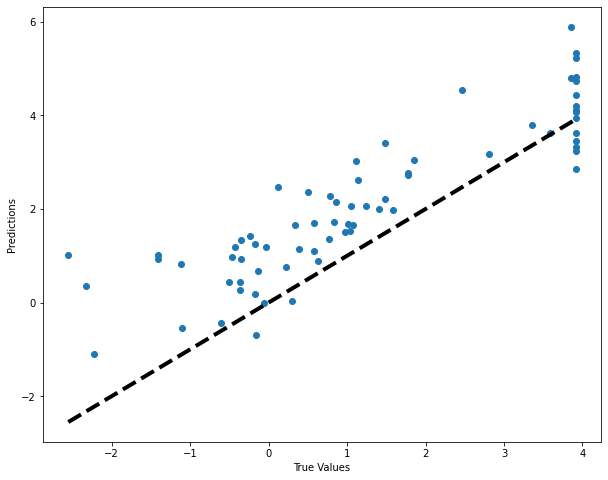

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the true values
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Add a line representing the ideal case where predicted = true
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

3/3 [==============================] - 0s 7ms/step


1.240277028881906

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

3/3 [==============================] - 0s 8ms/step


1.0192260531938526

In [ ]:
Y_P = y_pred.ravel()

In [ ]:
from scipy.stats import pearsonr

# assuming y_test and y_pred are arrays or pandas series
corr, _ = pearsonr(y_test, Y_P)
print('Pearson correlation: {:.2f} %'.format(corr * 100))


Pearson correlation: 88.85 %


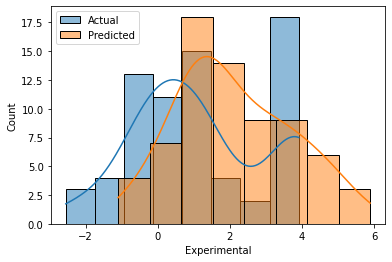

In [ ]:
sns.histplot(y_test,kde=True, label = 'Actual')
sns.histplot(Y_P,kde=True, label = 'Predicted')
plt.legend()

### Adding bias to the model

In [ ]:
pip install --upgrade tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

act = 'relu'
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation=act),
    tf.keras.layers.Dense(64, activation=act),
    tf.keras.layers.Dense(32, activation=act), ## new
    tf.keras.layers.Dense(16, activation=act), ## new
    tf.keras.layers.Dense(8, activation=act), ## new
    tf.keras.layers.Dense(1, use_bias=True, bias_initializer=tf.keras.initializers.Constant(value=1.1), activation = None)
])
## some activation functions strugles with negative values
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='mean_squared_error', optimizer=optimizer)

# X = DF[selected_features]
y = DF['Experimental']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(X_test)


3/3 [==============================] - 0s 9ms/step


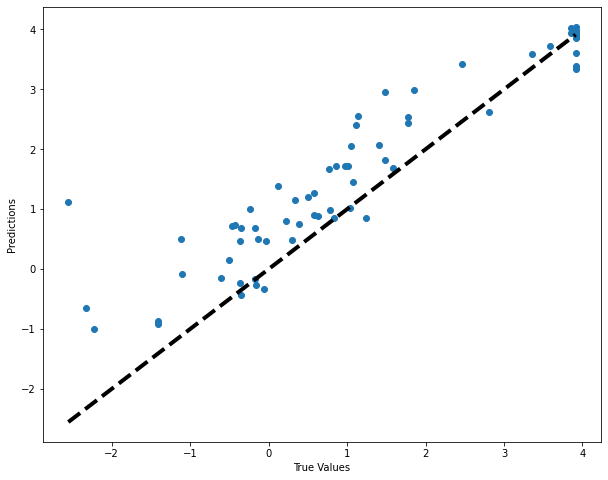

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the true values
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

In [ ]:
Y_P = y_pred.ravel()
from scipy.stats import pearsonr

corr, _ = pearsonr(y_test, Y_P)
print('Pearson correlation: {:.2f} '.format(corr))


Pearson correlation: 0.94 


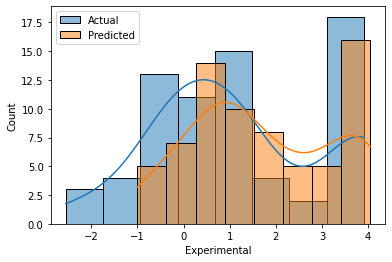

In [ ]:
sns.histplot(y_test,kde=True, label = 'Actual')
sns.histplot(Y_P,kde=True, label = 'Predicted')
plt.legend()

In [ ]:
np.mean(y_test),np.mean(Y_P), np.std(Y_P)

(1.2160429242857145, 1.7243454, 1.5266085)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, Y_P)
print('R^2 score:', r2)


R^2 score: 0.7927072957637475
